In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = pd.read_csv('Covid-19_IT.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,total
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


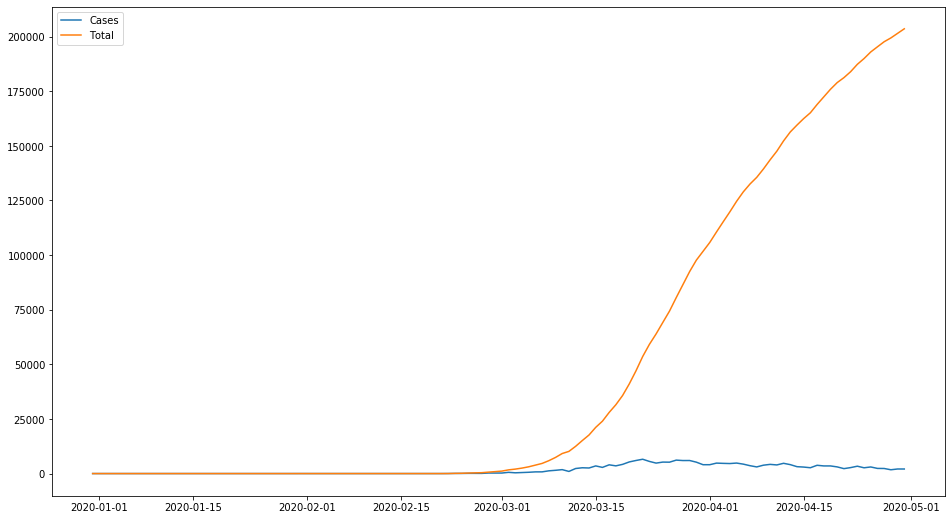

In [4]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['total']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [5]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [6]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [7]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.57526301e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.13512289e-03]
 [9.45554394e-03]
 [8.082964

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 0.0563
Epoch 2/20
42/42 - 0s - loss: 0.0451
Epoch 3/20
42/42 - 0s - loss: 0.0404
Epoch 4/20
42/42 - 0s - loss: 0.0350
Epoch 5/20
42/42 - 0s - loss: 0.0288
Epoch 6/20
42/42 - 0s - loss: 0.0235
Epoch 7/20
42/42 - 0s - loss: 0.0173
Epoch 8/20
42/42 - 0s - loss: 0.0128
Epoch 9/20
42/42 - 0s - loss: 0.0081
Epoch 10/20
42/42 - 0s - loss: 0.0056
Epoch 11/20
42/42 - 0s - loss: 0.0040
Epoch 12/20
42/42 - 0s - loss: 0.0035
Epoch 13/20
42/42 - 0s - loss: 0.0032
Epoch 14/20
42/42 - 0s - loss: 0.0031
Epoch 15/20
42/42 - 0s - loss: 0.0032
Epoch 16/20
42/42 - 0s - loss: 0.0031
Epoch 17/20
42/42 - 0s - loss: 0.0031
Epoch 18/20
42/42 - 0s - loss: 0.0031
Epoch 19/20
42/42 - 0s - loss: 0.0032
Epoch 20/20
42/42 - 0s - loss: 0.0031


In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [12]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

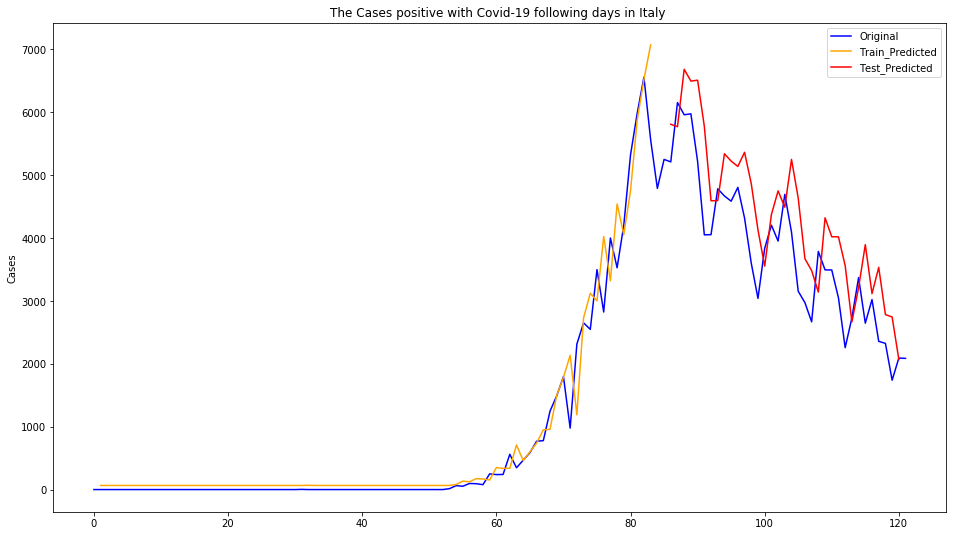

In [27]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days in Italy ')
plt.ylabel('Cases')
plt.show()

In [14]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [15]:
testY

array([[5210.    ],
       [6153.    ],
       [5959.    ],
       [5974.    ],
       [5217.    ],
       [4050.    ],
       [4053.    ],
       [4782.    ],
       [4668.    ],
       [4585.    ],
       [4805.    ],
       [4316.    ],
       [3599.    ],
       [3039.    ],
       [3836.    ],
       [4204.    ],
       [3950.9998],
       [4694.    ],
       [4092.    ],
       [3153.    ],
       [2972.    ],
       [2667.    ],
       [3785.9998],
       [3492.9998],
       [3491.    ],
       [3047.    ],
       [2256.    ],
       [2729.    ],
       [3370.0002],
       [2646.    ],
       [3021.    ],
       [2357.    ],
       [2324.    ],
       [1738.9999],
       [2091.    ]], dtype=float32)

In [16]:
testPredict

array([[5605.2144],
       [5559.389 ],
       [6688.129 ],
       [6452.3794],
       [6470.542 ],
       [5567.6094],
       [4230.012 ],
       [4233.3667],
       [5061.3325],
       [4930.1675],
       [4835.0635],
       [5087.872 ],
       [4529.1196],
       [3730.6348],
       [3124.0894],
       [3991.842 ],
       [4402.765 ],
       [4119.5576],
       [4960.027 ],
       [4277.013 ],
       [3246.3538],
       [3052.5205],
       [2729.413 ],
       [3936.511 ],
       [3614.6763],
       [3612.494 ],
       [3132.6492],
       [2300.9734],
       [2794.7368],
       [3480.7942],
       [2707.3281],
       [3104.841 ],
       [2405.5203],
       [2371.3083],
       [1773.3322]], dtype=float32)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

584.415
451694.2
672.082


In [18]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [19]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [20]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 0.0370
Epoch 2/20
42/42 - 0s - loss: 0.0105
Epoch 3/20
42/42 - 0s - loss: 0.0036
Epoch 4/20
42/42 - 0s - loss: 0.0029
Epoch 5/20
42/42 - 0s - loss: 0.0027
Epoch 6/20
42/42 - 0s - loss: 0.0029
Epoch 7/20
42/42 - 0s - loss: 0.0025
Epoch 8/20
42/42 - 0s - loss: 0.0036
Epoch 9/20
42/42 - 0s - loss: 0.0030
Epoch 10/20
42/42 - 0s - loss: 0.0032
Epoch 11/20
42/42 - 0s - loss: 0.0028
Epoch 12/20
42/42 - 0s - loss: 0.0031
Epoch 13/20
42/42 - 0s - loss: 0.0028
Epoch 14/20
42/42 - 0s - loss: 0.0028
Epoch 15/20
42/42 - 0s - loss: 0.0025
Epoch 16/20
42/42 - 0s - loss: 0.0027
Epoch 17/20
42/42 - 0s - loss: 0.0027
Epoch 18/20
42/42 - 0s - loss: 0.0027
Epoch 19/20
42/42 - 0s - loss: 0.0028
Epoch 20/20
42/42 - 0s - loss: 0.0031


In [22]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [23]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

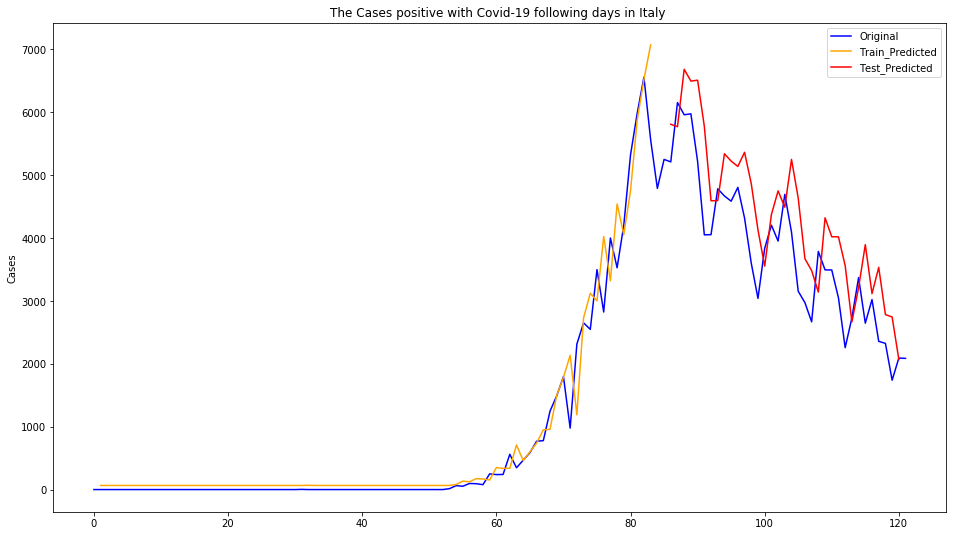

In [28]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days in Italy ')
plt.ylabel('Cases')
plt.show()

In [25]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

717.67096
708949.4
841.99133
